# Regresion Lineal


## Introducción

La [Regresion Lineal](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal) es un modelo matemático usado para aproximar la relación entre una variable dependiente $Y$ y m variables dependientes $X_1,X_2,...,X_m$. Este mdelo se puede expresar de la siguiente forma:

$$
\begin{equation}
Y=\beta_0+\beta_1 X_1 + ... + \beta_m X_m
\tag{1}
\end{equation}
$$

En el caso más sencillo, es decir, cuando tenemos solo una variable independiente $X$, la regresión lineal puede entenderse como una recta  
$$y= \beta_1 x + \beta_0$$

que aproxima linealmente de mejor manera la relación de los datos. A continuación se muestra una imagen en la cual podemos evidenciar esta aproximación. 

![Regresion lineal]('regre.png')


## Breve Historia

La primera regresión se hizo utilizando el metodo de los minimos cuadrados y fue publicada por Legendere en 1805. Aunque más tarde gauss publicó un trabajo en donde desarrollaba de manera más profunda el método de los mínimos cuadrados. 

![Legendre](https://www.fuenterrebollo.com/Matematicos/XVIII/legendre.jpg "Legendre")

Legendre (1752-1833)

El termino regresión se utilizó por primera vez en el estudio de [variables antropométricas](https://es.wikipedia.org/wiki/Antropometr%C3%ADa) al comparar las estaturas de los padres e hijos. En donde encontraron que los valores de las estaturas de los hijos con respecto a la media *regresaban* al promedio. Por está razón empezó a utilizarse el término **regresión**.


## Planteamiento del algortimo

El problema de la regresión lineal consiste en elegir unos valores determinados para los parametros $\beta_j$ de modo que la ecuación (1) quede totalmente determinada. Para ello, es necesario un conjunto de datos y un metodo de aproximación que usualmente es el [método de los minimos cuadrados](https://es.wikipedia.org/wiki/M%C3%ADnimos_cuadrados). El cual, busca encontrar los coeficientes $\beta_j$ que minimizan el cuadrado de la distancia de las observaciones al modelo. Es decir, supongamos que tenemos $n$ observaciones y $m$ variables independientes, en este caso estamos interesados en hallar los coeficientes $\beta_j$ que minimizan la siguiente ecuación.

$$
\begin{align}
\mathcal{L}(\beta_0,\beta_1,...,\beta_m) & = \sum_{i=1}^{n} \epsilon_i^2 \\
& = \sum_{i=1}^{n} \left( y_{i} - \beta_0 - \sum_{j=1}^{m} \beta_j x_{ij} \right)^2
\end{align}
$$


## Ejemplo

En la siguiente base de datos encontramos los datos de una encuesta realizada a 500 personas con ingresos entre $\$ 150000$ y $\$ 75000$ dolares anuales. Además se les pidio que calificaran su felicidad en una escala del 1 al 10 y se les pidio utilizar decimales en este proceso. Los datos fueron tomados del siguiente enlace: [An introduction to simple linear regression](https://www.scribbr.com/statistics/simple-linear-regression/). 

A continuación realizaremos un modelo de regresión lineal con estos datos

In [209]:
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import jax.numpy as np
import numpy as onp
from jax import grad,jit
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")
df = df[['income','happiness']]
df

,income,happiness
0,3.862647,2.3
1,4.979381,3.4
2,4.923957,4.6
3,3.214372,2.8
4,7.196409,5.6
...,...,...
493,5.249209,4.6
494,3.471799,2.5
495,6.087610,4.4
496,3.440847,2.1


Primero quiero identificar que relación hay entre las dos variables descritas anteriormente, para eso hare una grafica de puntos para identificar sus posibles tendencias.

In [210]:
fig = px.scatter(df,x='happiness', y="income")
fig.show()

Luego, quiero dividir dos datos en dos conjuntos uno de prueba y otro de test para ajustar el modelo.

In [211]:
X=df['happiness'] # Variable independiente
y=df['income'] # Variable dependiente

# Partir el conjunto de datos entrain y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

# Identificar en otra variable si el dato es de train o test
df['Type'] = X_train.apply(lambda x: 'Train')
df.fillna('Test',inplace=True)

X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
X,y=np.array(X),np.array(y)

In [212]:
fig = px.scatter(df,x='happiness', y="income",color='Type')
fig.show()

Ahora vamos a implementar el modelo para ello usamos la función de perdida y la diferenciación automatica para optimizar el modelo

In [213]:
def loss(b0,b1,x,y):
    return ((y-(b1*x+b0))**2).mean()

## Diferenciación Automática
grad_loss=jit(grad(loss,argnums=(0,1)))

Además vamos a utilizar el método del gradiente descendente para eso definimos las siguientes funciones:

In [214]:
def optimize(b0,b1,x,y,h=0.01):
    
    # Calcular Derivada
    b0_grad,b1_grad=grad_loss(b0,b1,x,y)
    
    # Gradiente Descendiente
    b1=b1-b1_grad*h
    b0=b0-b0_grad*h
    
    # Regresar Nuevos parámetros
    return b0,b1

Por último optimizaremos los parametros B0 y B1 del modeulo utilizando el metodo del gradiente descendiente y el conjunto de datos de entrenamiento

In [253]:
## Valores iniciales
B0,B1=0.0,0.0

# Resultados de intercepto y pendiente
inter,pend=[],[]
train_loss=[]
# Número de veces que se optimizaran los parametros
epochs=1000

for epoch in range(epochs):
    
    B0,B1=optimize(B0,B1,X_train,y_train,0.05)
    
    inter.append(B0)
    pend.append(B1)
    
    losss=loss(B0,B1,X_train,y_train)
    
    train_loss.append(losss)
    if epoch%100==0:
        print(f"Iteración {epoch}: {losss} B0 {B0} y B1 {B1}")

Iteración 0: 3.914929151535034 B0 0.435842901468277 y B1 1.6588903665542603
Iteración 100: 0.7443890571594238 B0 0.8134797811508179 y B1 1.0725442171096802
Iteración 200: 0.7417867183685303 B0 0.9146706461906433 y B1 1.0466060638427734
Iteración 300: 0.7416780591011047 B0 0.9353405833244324 y B1 1.041307806968689
Iteración 400: 0.7416735291481018 B0 0.9395628571510315 y B1 1.0402255058288574
Iteración 500: 0.7416734099388123 B0 0.940425455570221 y B1 1.0400043725967407
Iteración 600: 0.7416732907295227 B0 0.9406014084815979 y B1 1.0399593114852905
Iteración 700: 0.7416733503341675 B0 0.9406375288963318 y B1 1.0399500131607056
Iteración 800: 0.7416734099388123 B0 0.9406441450119019 y B1 1.0399483442306519
Iteración 900: 0.7416734099388123 B0 0.9406441450119019 y B1 1.0399483442306519


Acto seguido analizamos el comportamiento del modelo con respecto a los datos de prueba. Es importate analizar tanto los datos de entrenamiento como los datos de prueba, pues es importante ver que el modelo no está sobre ajustado por está razón realizo las siguientes graficas. 

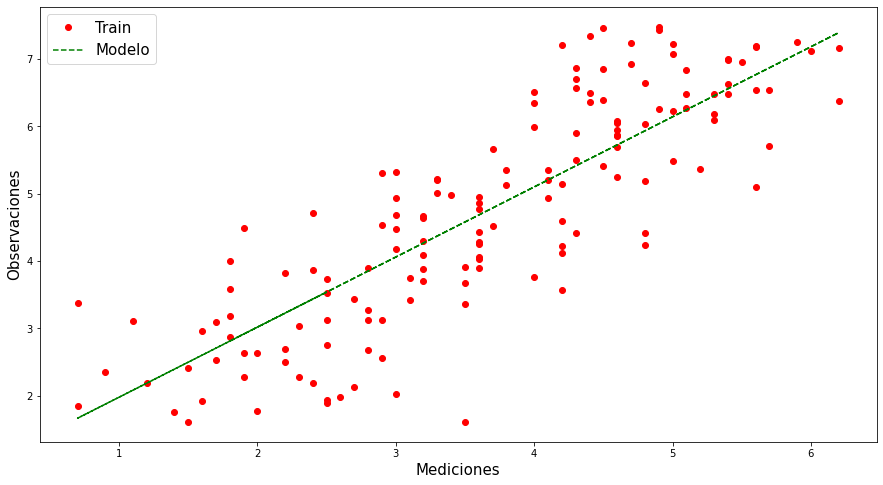

In [250]:
mod=pend[-1]*X_test+inter[-1]


plt.figure(figsize=(15,8))
# plt.plot(X_train,y_train,'o',color='b')
plt.plot(X_test,y_test,'o',color='r')
plt.plot(X_test,mod,'g--')
plt.xlabel("Mediciones",fontsize=15)
plt.ylabel("Observaciones",fontsize=15)
plt.legend(["Train","Modelo"],fontsize=15)
plt.show()

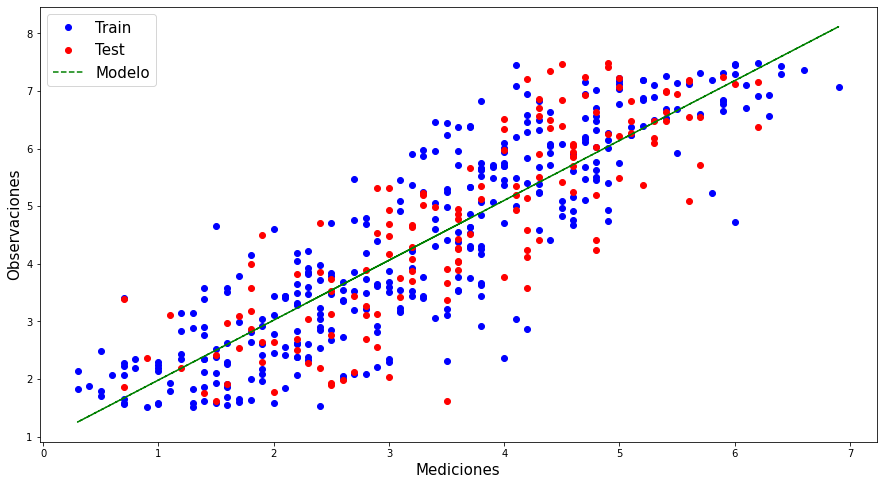

In [251]:
mod=pend[-1]*X+inter[-1]


plt.figure(figsize=(15,8))
plt.plot(X_train,y_train,'o',color='b')
plt.plot(X_test,y_test,'o',color='r')
plt.plot(X,mod,'g--')
plt.xlabel("Mediciones",fontsize=15)
plt.ylabel("Observaciones",fontsize=15)
plt.legend(["Train","Test","Modelo"],fontsize=15)
plt.show()

Por último se presenta el diagrama de la función de perdida en cada una de las epocas, en el que se puede evidencia la buena convergencia del módelo.

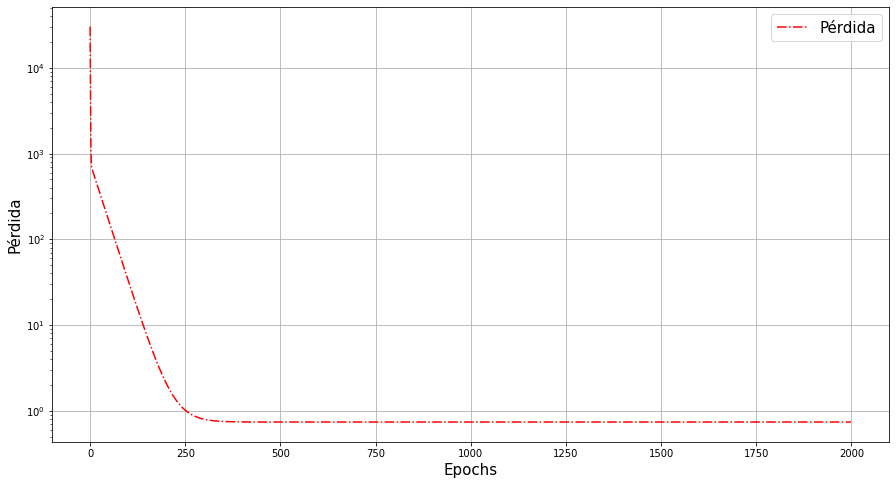

In [252]:
%matplotlib inline
plt.figure(figsize=(15,8))
plt.semilogy(range(epochs),train_loss,'r-.')
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Pérdida",fontsize=15)
plt.legend(["Pérdida"],fontsize=15)
plt.grid()
plt.show()

# Conclusiones

- La regresión lineal es muy buena herramienta para predecir valores numericos para ciertos conjuntos de datos. Aunque es importante tener en cuenta que si bien las aproximaciones que brinda esta no son perfectas si constituye una manera de entender y predecir el funcionamiento de ciertos conjuntos de datos.

- Fueron necesarias epocas y un una aproximación inicial cercana a $(0,0)$ para que el algoritmo convergiera a un valor. Esto se debe a que la forma de los datos no es precisamente una linea, por eso creo que el algoritmo no es tan rapido y el ajuste no es perfecto.

- Si bien ya habia realizado anteriormente modelos usando la regresion lineal, decidí hacer este algoritmo a mano y utilizando solamente una variable ya que siempre perdia el referente grafico al realizarlo en varias dimensiones. Por esta razón, queria hacer un ejemplo sencillo de una sola variable para poder evidenciar el comportamiento y entender un poco mejor la función de prueba. Con esto entiendo un poco más como funciona el modelo y siento que ya puedo llevarlo mucho mejor a varias dimensiones. 